In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv(url)# Load Data into DataFrame from Data on Github
song_features = pd.read_csv('https://raw.githubusercontent.com/MerleSt/SpotifyPlaylistMoosic/main/Data/df_audio_features_5000_cleaned_whitespaces.csv')

In [3]:
# Let us explore the data a bit and transform it
song_features.head(10)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
5,Desafinado ...,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,,249387,4,5pstSsK0G4q86gdyy1Spqh,https://open.spotify.com/track/5pstSsK0G4q86gd...
6,Madalena ...,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,,145187,4,33u3dO0JWjerYpFN61J3ug,https://open.spotify.com/track/33u3dO0JWjerYpF...
7,O Meu Amor É Glòria ...,Sílvia Pérez Cruz,0.504,0.7330,7,-10.720,1,0.3890,0.696,0.000056,0.673,0.886,96.565,,309760,4,0ylJQpV3K4XnhWhLDMFmH7,https://open.spotify.com/track/0ylJQpV3K4XnhWh...
8,Brigas Nunca Mais ...,Paula Morelenbaum,0.694,0.5460,10,-11.452,1,0.0400,0.398,0.076000,0.153,0.641,170.032,,204027,4,1wL2dk42Cxu4zCJs4SvFsZ,https://open.spotify.com/track/1wL2dk42Cxu4zCJ...
9,Previsao ...,Bossacucanova,0.674,0.8640,1,-7.971,1,0.0382,0.641,0.358000,0.139,0.536,99.995,,181133,4,5iKuMCDh634YGrg2HrhtHp,https://open.spotify.com/track/5iKuMCDh634YGrg...


For a Cluster Analysis we need only numerical columns. Furthermore, we need indices that can be recognized, which is why I decided to use the artist, as well as the name (song title) as index and drop the html and id. 

In [4]:
# Drop duplicates
duplicates = song_features[song_features.duplicated(subset=['artist', 'name'], keep=False)]

In [5]:
duplicates_to_drop = song_features.duplicated(subset=['artist', 'name'], keep='first')
song_features = song_features[~duplicates_to_drop]

In [6]:
# Set indices
song_features.set_index(['name', 'artist'], inplace =True)

In [7]:
# Drop the columns
# Also drop type since it is empty
song_features.drop(columns=['html', 'id', 'type'], inplace=True)

In [8]:
# Check the Data types of the columns
song_features.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

The data types look great, now we should look for outliers. We do not need to drop them, but it can help us decide which scaling method or clustering algorithm to use.

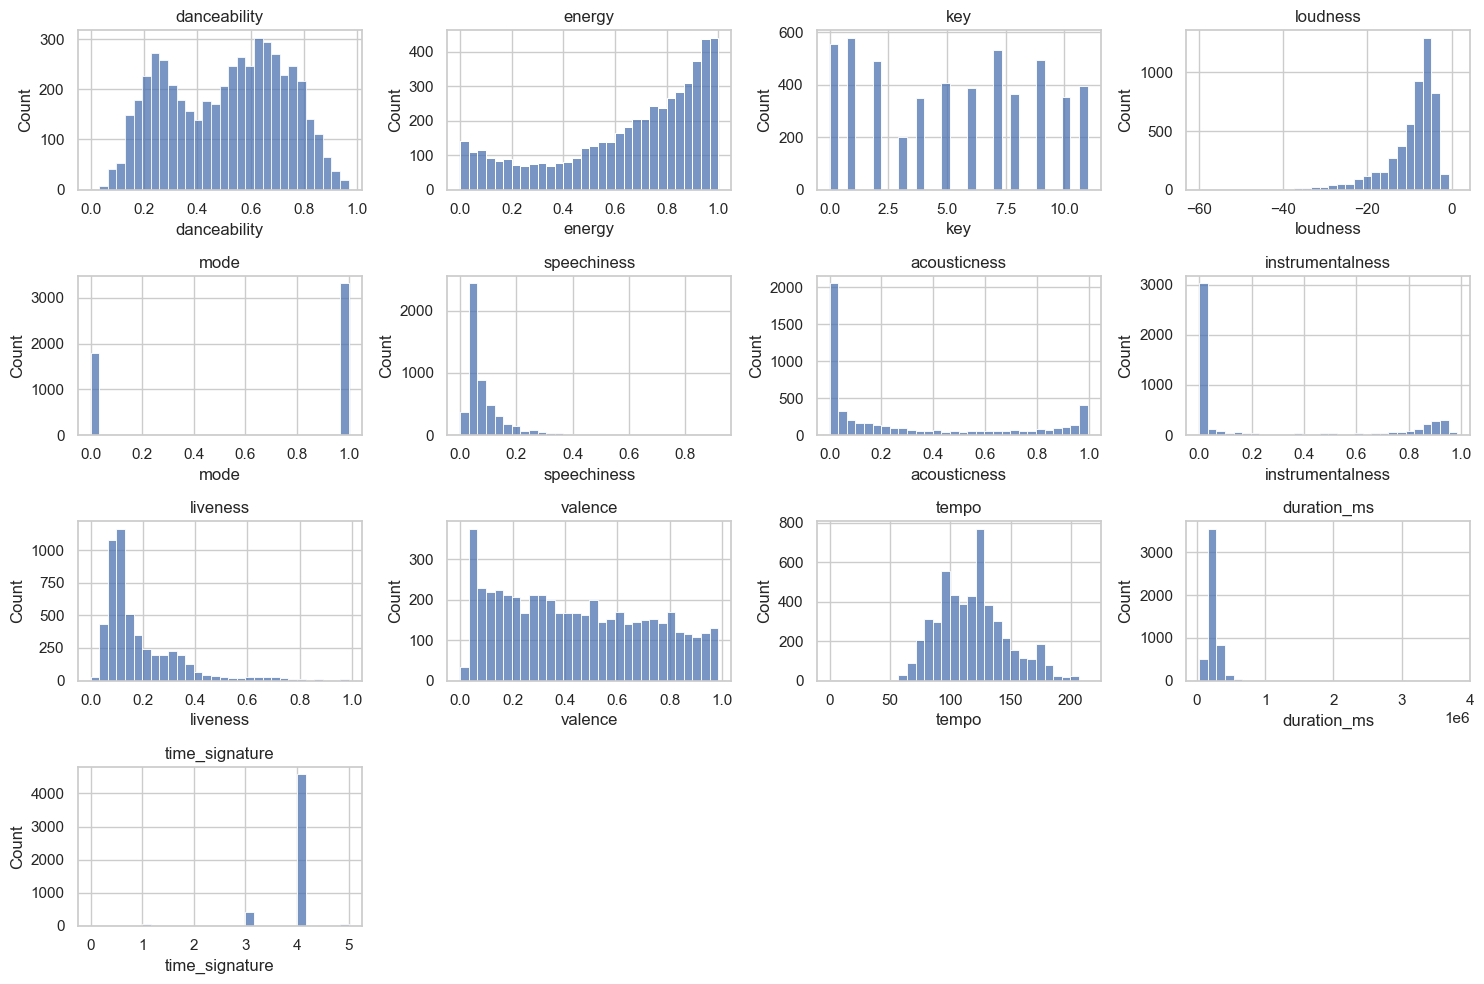

In [9]:
# Outliers
# Set the size and style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Loop over the columns and create a histogram for each one
for i, column in enumerate(song_features.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for 16 columns
    sns.histplot(song_features[column], kde=False, bins=30)
    plt.title(column)
    plt.tight_layout()

plt.show()

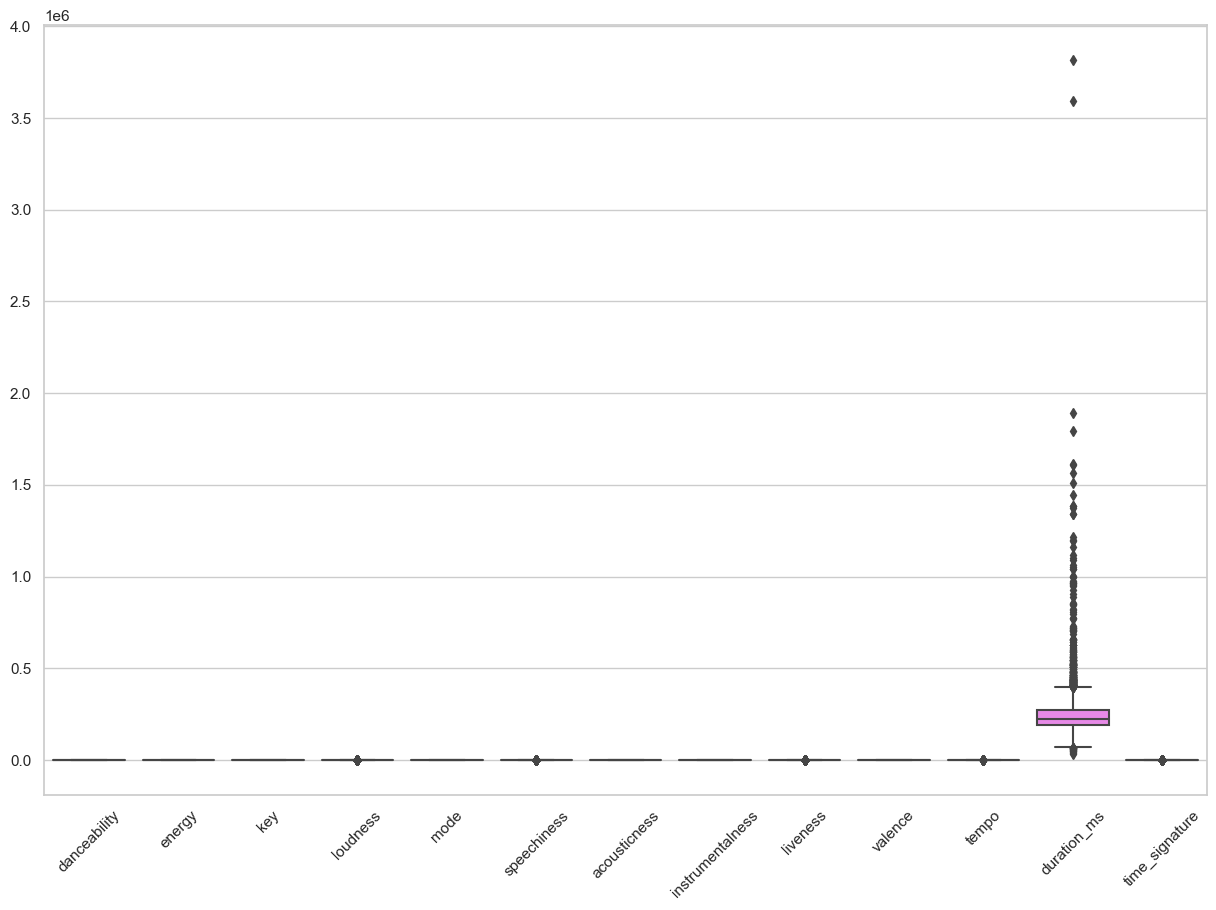

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=song_features)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

In [11]:
for column in song_features.columns:
    Q1 = song_features[column].quantile(0.25)
    Q3 = song_features[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((song_features[column] < (Q1 - 1.5 * IQR)) | (song_features[column] > (Q3 + 1.5 * IQR))).sum()
    print(f'The {column} has to following outliers: {outliers_iqr}')

The danceability has to following outliers: 0
The energy has to following outliers: 0
The key has to following outliers: 0
The loudness has to following outliers: 349
The mode has to following outliers: 0
The speechiness has to following outliers: 427
The acousticness has to following outliers: 0
The instrumentalness has to following outliers: 0
The liveness has to following outliers: 288
The valence has to following outliers: 0
The tempo has to following outliers: 48
The duration_ms has to following outliers: 301
The time_signature has to following outliers: 536


In [12]:
song_features

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [13]:
# Export the DataFrame
song_features.to_csv('/Users/merlesteffen/Documents/GitHub/Moosic/Data/song_fatures_cleaned.csv', index=True)